# פרוייקט גמר- ניתוח נתונים

## קבוצה מספר -26 ,"Major Safety Events"- שם הדאטה

#### :מגישות

   #### נעמה קולומבוס
   #### עדי רמות


### :רקע על הדאטה

.הדאטה שבחרנו עוסקת באירועי בטיחות גדולים בתחבורה ציבורית בארצות הברית

המידע נלקח מ[אתר משרד התחבורה של ארצות הברית](https://data.transportation.gov/Public-Transit/Major-Safety-Events/9ivb-8ae9/about_data)
ובו יש הסבר על הנתונים וקישור אליהם

# <b id="section_2">  </b> <b style='color:#F05454'>1. Relevant libraries </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:##F05454;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
url1 = 'https://raw.githubusercontent.com/naamaandadi2024/new_project/main/Major_Safety_Events_20240610_0%20(1).csv'
url2 = 'https://raw.githubusercontent.com/naamaandadi2024/new_project/main/Major_Safety_Events_20240610_1%20(3).csv'
url3 = 'https://raw.githubusercontent.com/naamaandadi2024/new_project/main/Major_Safety_Events_20240610_2%20(3).csv'
url4 = 'https://raw.githubusercontent.com/naamaandadi2024/new_project/main/Major_Safety_Events_20240610_3%20(3).csv'
transit_df_0 = pd.read_csv(url1)
transit_df_1 = pd.read_csv(url2)
transit_df_2 = pd.read_csv(url3)
transit_df_3 = pd.read_csv(url4)

C:\Users\USER\AppData\Local\Temp\ipykernel_5564\609957632.py:5: DtypeWarning: Columns (39,40,43,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  transit_df_0 = pd.read_csv(url1)
C:\Users\USER\AppData\Local\Temp\ipykernel_5564\609957632.py:6: DtypeWarning: Columns (46,47,55) have mixed types. Specify dtype option on import or set low_memory=False.
  transit_df_1 = pd.read_csv(url2)
C:\Users\USER\AppData\Local\Temp\ipykernel_5564\609957632.py:7: DtypeWarning: Columns (17,39,40,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  transit_df_2 = pd.read_csv(url3)
C:\Users\USER\AppData\Local\Temp\ipykernel_5564\609957632.py:8: DtypeWarning: Columns (20,24,39,40,43) have mixed types. Specify dtype option on import or set low_memory=False.
  transit_df_3 = pd.read_csv(url4)


In [3]:
transit_df = pd.concat([transit_df_0 ,transit_df_1, transit_df_2, transit_df_3]).reset_index()

# <b id="section_2">  </b> <b style='color:#F05454'>2. dtypes and information </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:##F05454;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

In [4]:
transit_df.shape

(90376, 108)

In [5]:
transit_df.columns

Index(['index', 'NTD ID', 'Agency', 'Primary UZA UACE Code', 'Rail/Bus/Ferry',
       'Mode Name', 'Mode', 'Type of Service', 'Fixed Route Flag', 'Year',
       ...
       'Pedestrian Walking Along Tracks Injuries',
       'Pedestrian Walking Along Tracks Serious Injuries',
       'Occupant of Other Vehicle Injuries',
       'Occupant of Other Vehicle Serious Injuries', 'Other Injuries',
       'Other Serious Injuries', 'Suicide Injuries',
       'Suicide Serious Injuries', 'Total Serious Injuries', 'Person List'],
      dtype='object', length=108)

In [6]:
transit_df.drop('index', axis=1, inplace=True)

הורדנו את עמודת האינדקס מהדאטה

In [7]:
transit_df.columns

Index(['NTD ID', 'Agency', 'Primary UZA UACE Code', 'Rail/Bus/Ferry',
       'Mode Name', 'Mode', 'Type of Service', 'Fixed Route Flag', 'Year',
       'Event Description',
       ...
       'Pedestrian Walking Along Tracks Injuries',
       'Pedestrian Walking Along Tracks Serious Injuries',
       'Occupant of Other Vehicle Injuries',
       'Occupant of Other Vehicle Serious Injuries', 'Other Injuries',
       'Other Serious Injuries', 'Suicide Injuries',
       'Suicide Serious Injuries', 'Total Serious Injuries', 'Person List'],
      dtype='object', length=107)

In [8]:
transit_df.shape

(90376, 107)

In [9]:
transit_df.head()

,NTD ID,Agency,Primary UZA UACE Code,Rail/Bus/Ferry,Mode Name,Mode,Type of Service,Fixed Route Flag,Year,Event Description,...,Pedestrian Walking Along Tracks Injuries,Pedestrian Walking Along Tracks Serious Injuries,Occupant of Other Vehicle Injuries,Occupant of Other Vehicle Serious Injuries,Other Injuries,Other Serious Injuries,Suicide Injuries,Suicide Serious Injuries,Total Serious Injuries,Person List
0,40,Central Puget Sound Regional Transit Authority,80389,Rail,Light Rail,LR,DO,True,2024,A person used the emergency door release to ge...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,20080,New Jersey Transit Corporation,63217,Bus,Bus,MB,DO,True,2024,Parked vehicle opened rear driver side door ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,90173,Transit Joint Powers Authority for Merced County,56251,Bus,Bus,MB,PT,True,2024,{Redacted} is submitting the {Redacted} {Redac...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,I Occ Other Veh Adult (19 to 60) F
3,40087,City of Durham,25228,Bus,Bus,MB,PT,True,2024,The bus driver was at a stop at Walgreens and ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1,King County Department of Metro Transit,80389,Bus,Bus,MB,DO,True,2024,"As coach was turning left at an intersection, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I Ped in Xwalk Adult (19 to 60) F


בדיקת ערכים חסרים

In [10]:
transit_df.isnull().sum()

NTD ID                          0
Agency                          0
Primary UZA UACE Code           0
Rail/Bus/Ferry                  0
Mode Name                       0
                            ...  
Other Serious Injuries         17
Suicide Injuries               17
Suicide Serious Injuries       17
Total Serious Injuries         17
Person List                 24185
Length: 107, dtype: int64

In [11]:
transit_df[['Weather']].value_counts()

Weather           
Clear                 53777
Cloudy                 7335
Raining                5498
Snowing / sleeting     1548
Tunnel                 1213
Foggy / misting         452
Other                    45
Clear, Clear              5
Windy                     2
Cloudy, Cloudy            1
Name: count, dtype: int64

בעמודת מזג האוויר איחדנו בין ערכים עם שמות דומים

In [12]:
transit_df["Weather"] = transit_df["Weather"].str.replace("Clear, Clear", "Clear")

transit_df["Weather"] = transit_df["Weather"].str.replace("Cloudy, Cloudy", "Cloudy")

# <b id="section_2">  </b> <b style='color:#F05454'> New columns </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:##F05454;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

הוספנו עמודה חדשה שמחלקת את זמני היום לארבעה חלקים

In [13]:
transit_df['Event Time'] = pd.to_datetime(transit_df['Event Time'])
transit_df['Hour'] = transit_df['Event Time'].dt.hour

C:\Users\USER\AppData\Local\Temp\ipykernel_5564\1924144595.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transit_df['Event Time'] = pd.to_datetime(transit_df['Event Time'])


In [14]:
def get_time_period(time_str):
    if pd.isnull(time_str):
        return np.nan
    try:
        time = pd.to_datetime(time_str, format='%H:%M').time()
        hour = time.hour
        if hour >= 6 and hour < 12:
            return "Morning"
        elif hour >= 12 and hour < 18:
            return "Afternoon"
        elif hour >= 18 and hour < 24:
            return "Evening"
        else:
            return "Night"
    except ValueError:
        return np.nan
transit_df['Time Period'] = transit_df['Event Time'].apply(get_time_period)

In [15]:
transit_df[["Time Period"]].value_counts()


Time Period
Afternoon      35693
Morning        26759
Evening        20352
Night           7571
Name: count, dtype: int64

# <b id="section_2">  </b> <b style='color:#F05454'> Observation 1.  </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:##F05454;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# "מסקנה 1- "התנגשויות

.רצינו לבדוק את ההבדל בין מקרי ההתנגשויות של כלי הרכב השונים

In [16]:
rail_df = transit_df.loc[transit_df['Event Type'] == 'Rail Collision']
non_rail_df = transit_df.loc[transit_df['Event Type'] == 'Non-Rail Collision']


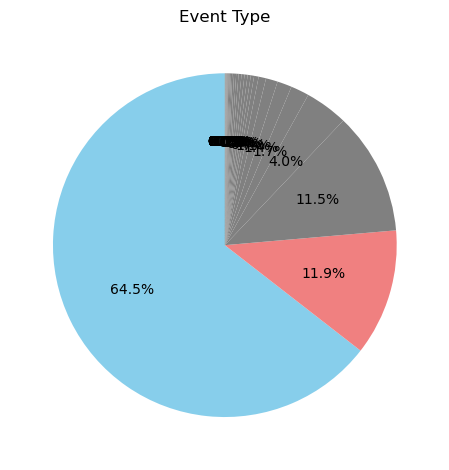

In [17]:
pie_df = transit_df['Event Type'].value_counts()

fig, ax = plt.subplots()
patches, texts, autotexts = plt.pie(pie_df, autopct='%1.1f%%', startangle=90);

two_largest_slices = pie_df.nlargest(2)
colors = ['skyblue', 'lightcoral']
default_color = 'gray'

for i, patch in enumerate(patches):
    if pie_df.index[i] in two_largest_slices.index:
        patch.set_facecolor(colors[i])
    else:
        patch.set_facecolor(default_color)

ax.set_title('Event Type')
plt.tight_layout()
plt.show()


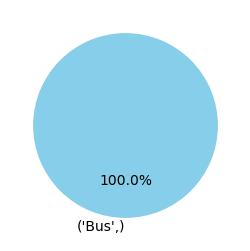

In [18]:
plt.figure(figsize=(3 ,3))

pie_df = non_rail_df[['Rail/Bus/Ferry']].value_counts()

#plt.pie(pie_df ,autopct='%1.1f%%', startangle=90);
plt.pie(pie_df, labels=pie_df.index,  autopct='%1.1f%%', startangle=90, textprops=dict(color="black", size=10), colors = ['skyblue']);


.נוכחנו לדעת שיותר ממחצית אירועי הדאטה הם מקרי התנגשויות 'לא של רכבת' ואחריהם מקרי התנגשויות של רכבת. בנוסף, כל מקרי ההתנגשות 'לא של רכבת' הם התנגשות של אוטובוס

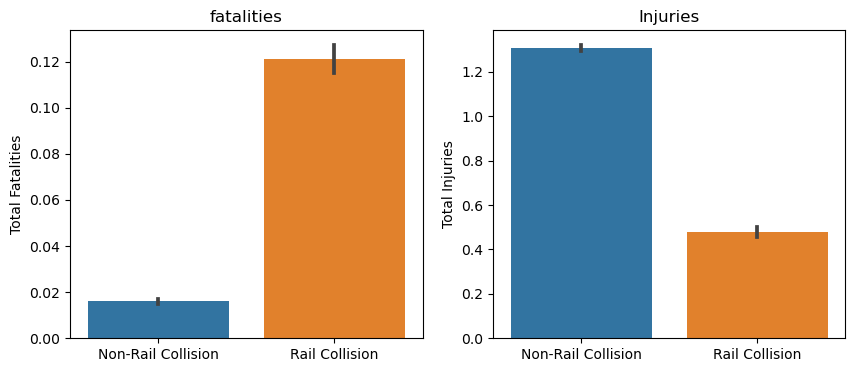

In [19]:
fig, axes = plt.subplots(figsize=(10, 4), ncols=2)

myorder = transit_df["Event Type"].value_counts().index[0:3:2]
sns.barplot(transit_df, x = "Event Type", y = "Total Fatalities",  order=myorder, ax = axes[0])
axes[0].set_title('fatalities')
axes[0].set_xlabel('')

myorder = transit_df["Event Type"].value_counts().index[0:3:2]
sns.barplot(transit_df, x = "Event Type", y = "Total Injuries",  order=myorder, ax = axes[1])
axes[1].set_title('Injuries')
axes[1].set_xlabel('')
plt.show()

בהשוואה בין סוגי ההתנגשויות ומספר הפצועים וההורגים באופן יחסי, נוכחנו לדעת שהיו יותר מקרי פציעות בהתנגשויות אוטובוס מאשר התנגשויות רכבת ויותר מקרי מוות בהתנגשויות רכבת לעומת התנגשויות אוטובוס 
. רצינו למצוא סיבה הגיונית לממצא זה

In [20]:
collision_with_non_rail_df = non_rail_df.groupby('Collision With')[['Total Injuries','Total Fatalities', 'Total Serious Injuries' ]].sum().reset_index()\
                            .sort_values(by="Total Injuries", ascending = False )
collision_with_non_rail_df                          
                            

,Collision With,Total Injuries,Total Fatalities,Total Serious Injuries
3,Motor Vehicle,67611.0,533.0,804.0
7,Person,5017.0,364.0,57.0
1,Fixed Object,2024.0,7.0,29.0
10,Transit vehicle,1118.0,7.0,3.0
6,Other,161.0,2.0,2.0
0,Animal,34.0,0.0,2.0
4,"Motor Vehicle, Motor Vehicle",27.0,0.0,0.0
8,"Person, Motor Vehicle",9.0,0.0,0.0
11,"Transit vehicle, Transit vehicle",7.0,0.0,0.0
5,"Motor Vehicle, Motor Vehicle, Motor Vehicle",2.0,0.0,0.0


In [21]:
collision_with_rail_df = rail_df.groupby('Collision With')[['Total Injuries','Total Fatalities', 'Total Serious Injuries']].sum().reset_index()\
                            .sort_values(by="Total Injuries", ascending = False )
collision_with_rail_df                          
                  

,Collision With,Total Injuries,Total Fatalities,Total Serious Injuries
8,Person,1960.0,731.0,265.0
4,Non Transit Motor Vehicle (POV),1264.0,30.0,143.0
2,Motor Vehicle,821.0,15.0,0.0
11,Rail Transit Vehicle/Rail Passenger Train - Re...,202.0,0.0,2.0
1,Fixed Object,69.0,0.0,3.0
9,Rail Transit Vehicle-Rail Transit Maintenance ...,46.0,1.0,4.0
10,Rail Transit Vehicle/Rail Passenger Train - No...,32.0,0.0,3.0
5,Non-Rail Transit Vehicle (Transit owned and op...,31.0,0.0,0.0
7,Other,26.0,1.0,0.0
12,Rail Vehicle,16.0,0.0,0.0


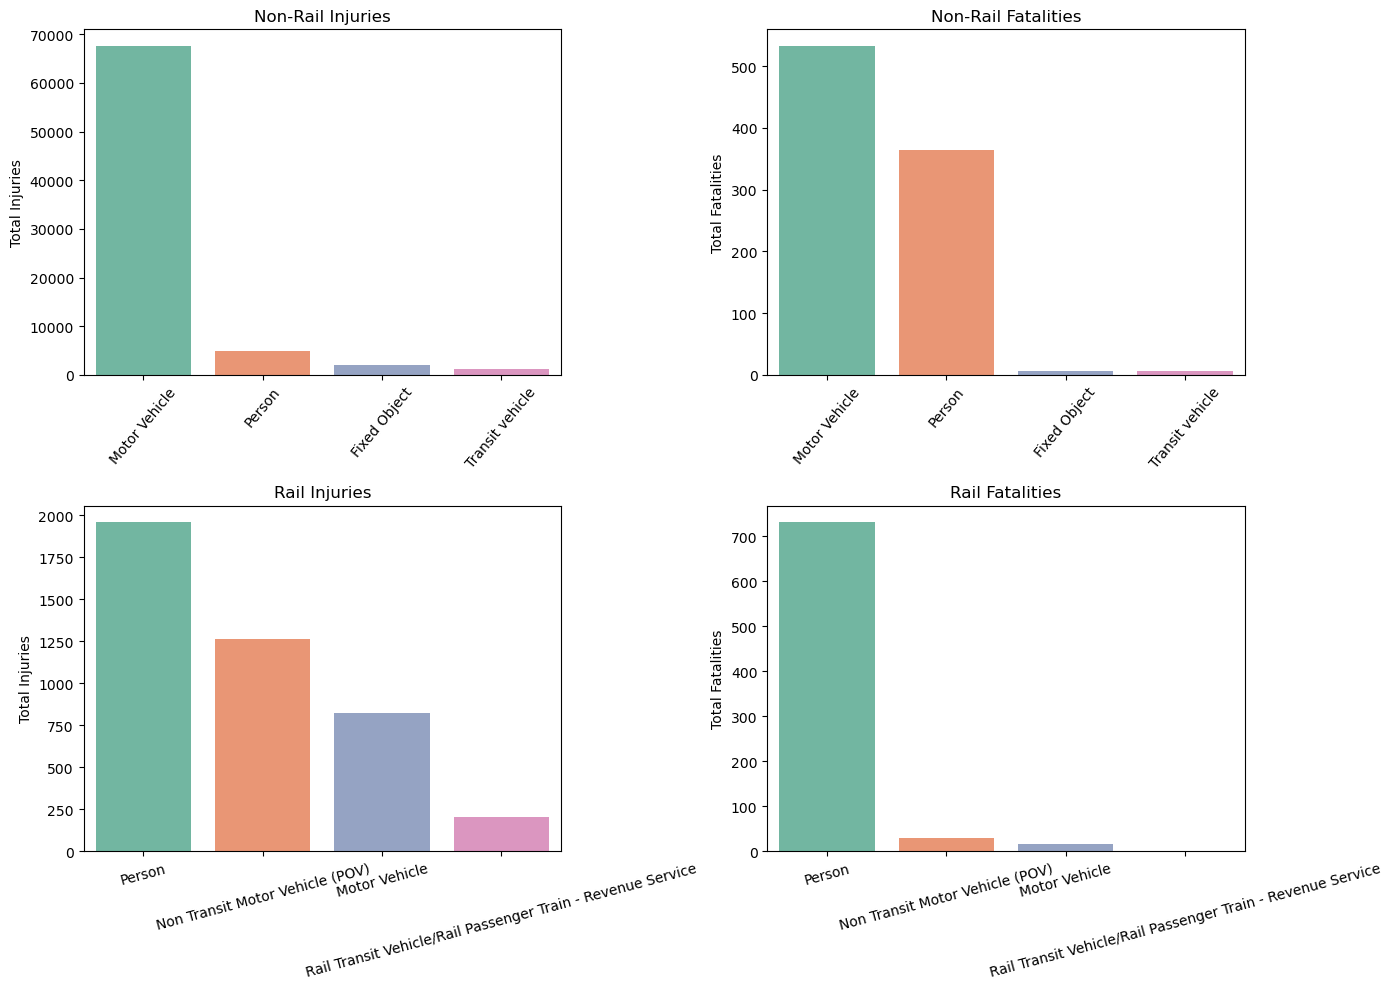

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.barplot(collision_with_non_rail_df.head(4), x = "Collision With", y = "Total Injuries", palette="Set2", ax=axes[0, 0])
axes[0,0].tick_params(axis='x', labelrotation=50)
axes[0, 0].set_title("Non-Rail Injuries") 
axes[0,0].set_xlabel('')


sns.barplot(collision_with_non_rail_df.head(4), x = "Collision With", y = "Total Fatalities", palette="Set2", ax=axes[0, 1])
axes[0,1].tick_params(axis='x', labelrotation=50)
axes[0, 1].set_title("Non-Rail Fatalities") 
axes[0,1].set_xlabel('')

sns.barplot(collision_with_rail_df.head(4), x = "Collision With", y = "Total Injuries", palette="Set2", ax=axes[1, 0])
axes[1,0].tick_params(axis='x', labelrotation=15)
axes[1, 0].set_title("Rail Injuries") 
axes[1,0].set_xlabel('')

sns.barplot(collision_with_rail_df.head(4), x = "Collision With", y = "Total Fatalities", palette="Set2", ax=axes[1, 1])
axes[1,1].tick_params(axis='x', labelrotation=15)
axes[1, 1].set_title("Rail Fatalities") 
axes[1,1].set_xlabel('')


plt.tight_layout()
plt.show()

#### :מסקנה


גילנו שבקרב התנגשויות הרכבת, מספר הפצועים וההרוגים כתוצאה מההתנגשויות באדם (לעומת התנגשות בכלי רכב אחרים) היה הגבוה ביותר. כלומר התנגשות רכבת באדם תביא לסיכויים גדולים של מוות.

בקרב התנגשויות לא- רכבת (אוטובוס) מספר הפצועים וההרוגים כתוצאה מהתנגשויות  ברכב ממנוע היה הגבוה ביותר (לעומת התנגשות באדם למשל). כנראה התנגשויות מסוג זה פחות קטלניות מהתנגשות רכבת באדם ולכן יש פחות הרוגים בהתנגשויות לא-רכבת בהשוואה להתנגשויות רכבת אך יותר פצועים,  כי מספר הנפגעים בכל אירוע יכול להיות יותר גדול מהתנגשות באדם בודד. 

מידע זה יכול להסביר למה בסוג זה מספר הפצועים גדול יחסית לעומת ההרוגים.


# <b id="section_2">  </b> <b style='color:#F05454'> Observation 2.  </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:##F05454;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# "מסקנה 2- "הקשר בין מזג האוויר למהירות 

.רצינו לבדוק האם מזג האוויר משפיע על מהירות כלי התחבורה

In [23]:

weather_df = transit_df.groupby('Weather')[['Vehicle Speed','Property Damage'  ]].mean().reset_index()\
                            .sort_values(by="Vehicle Speed", ascending = False )
weather_df



,Weather,Vehicle Speed,Property Damage
6,Tunnel,27.259967,11882.344622
2,Foggy / misting,23.866667,9472.305405
3,Other,21.295455,282640.705882
1,Cloudy,20.345233,9234.150223
0,Clear,18.377776,9347.690727
5,Snowing / sleeting,18.114980,10288.970115
4,Raining,17.950418,8672.982842
7,Windy,4.500000,34000.000000


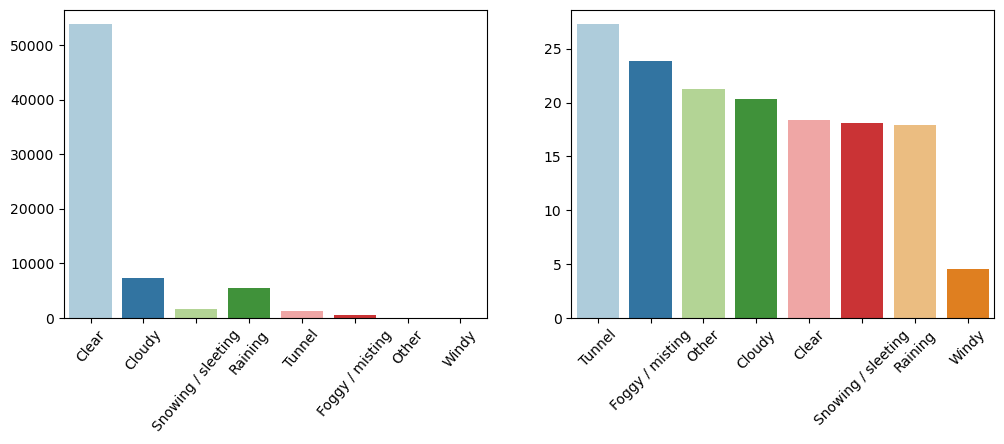

In [24]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=2)
sns.countplot(data = transit_df, x = 'Weather', palette="Paired", ax=axes[0])
axes[0].tick_params(axis='x', labelrotation=50)
axes[0].set_xlabel('')
axes[0].set_ylabel('')

sns.barplot(weather_df, x ='Weather', y = "Vehicle Speed", palette="Paired", width=0.8, ax=axes[1] )
axes[1].set_xlabel('')
axes[1].set_ylabel('')
plt.xticks(rotation=45)
plt.show()

"מכווין שרצינו לבדוק את השפעת מזג האוויר נתייחס רק למשתני מזג אויר קלאסיים ולא "מנהרה" או "אחר

.בבדיקה מה עמודת המהירות מודדת נוכחנו לדעת שהיא בודקת את המהירות הנמדדת או המהירות המשוערת בזמן האירוע עצמו ולאו דווקא את המהירות הממוצעת של כל הנסיעה 

.לפי הגרפים, למרות שרוב ארועי כלי תחבורה התרחשו במזג אוויר בהיר, המהירות הממוצעת בזמן הפגיעה הייתה גדולה יותר במזג אוויר ערפילי ומעונן

כמו כן, רצינו לבדוק מה היה סוג האירוע המוביל בכל מזג אויר 




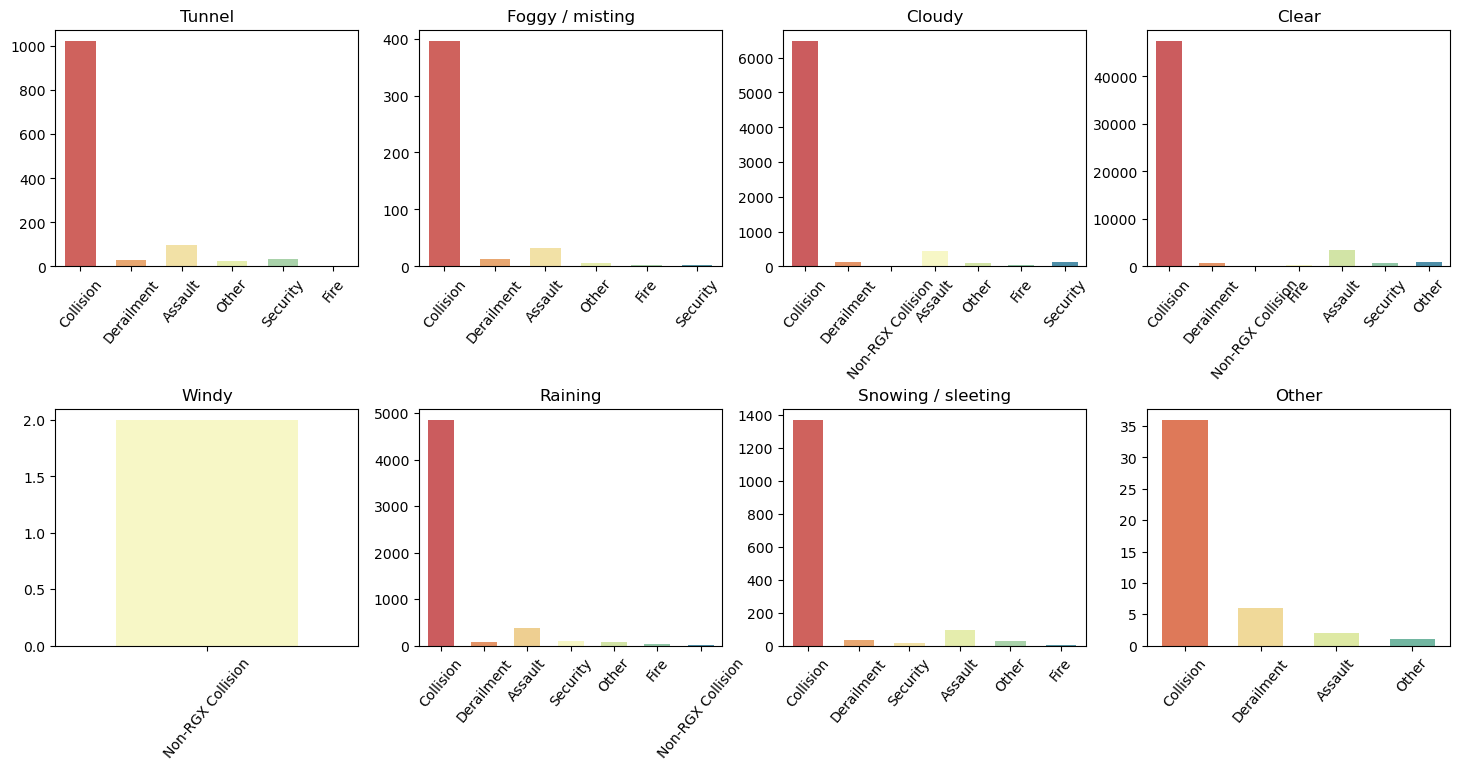

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
plt.subplots_adjust(hspace=0.6)

sns.countplot(transit_df.query("`Weather` == 'Tunnel'"), x = "Event Type Group", width=0.6,palette="Spectral", ax=axes[0, 0] )
axes[0,0].tick_params(axis='x', labelrotation=50)
axes[0, 0].set_title('Tunnel')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')

sns.countplot(transit_df.query("`Weather` == 'Foggy / misting'"), x = "Event Type Group", width=0.6,palette="Spectral", ax=axes[0,1] )
axes[0,1].tick_params(axis='x', labelrotation=50)
axes[0, 1].set_title('Foggy / misting')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

sns.countplot(transit_df.query("`Weather` == 'Cloudy'"), x = "Event Type Group", width=0.6, palette="Spectral", ax=axes[0,2] )
axes[0,2].tick_params(axis='x', labelrotation=50)
axes[0, 2].set_title('Cloudy')
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('')

sns.countplot(transit_df.query("`Weather` == 'Clear'"), x = "Event Type Group", width=0.6,  palette="Spectral", ax=axes[0,3] )
axes[0,3].tick_params(axis='x', labelrotation=50)
axes[0, 3].set_title('Clear')
axes[0, 3].set_xlabel('')
axes[0, 3].set_ylabel('')

sns.countplot(transit_df.query("`Weather` == 'Windy'"), x = "Event Type Group", width=0.6,  palette="Spectral", ax=axes[1,0] )
axes[1,0].tick_params(axis='x', labelrotation=50)
axes[1, 0].set_title('Windy')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')

sns.countplot(transit_df.query("`Weather` == 'Raining'"), x = "Event Type Group", width=0.6, palette="Spectral", ax=axes[1,1] )
axes[1,1].tick_params(axis='x', labelrotation=50)
axes[1, 1].set_title('Raining')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')

sns.countplot(transit_df.query("`Weather` == 'Snowing / sleeting'"), x = "Event Type Group", width=0.6,  palette="Spectral",ax=axes[1,2] )
axes[1,2].tick_params(axis='x', labelrotation=50)
axes[1, 2].set_title('Snowing / sleeting')
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylabel('')

sns.countplot(transit_df.query("`Weather` == 'Other'"), x = "Event Type Group", width=0.6, palette="Spectral", ax=axes[1,3] )
axes[1,3].tick_params(axis='x', labelrotation=50)
axes[1, 3].set_title('Other')
axes[1, 3].set_xlabel('')
axes[1, 3].set_ylabel('')

plt.show()

.בכל מזגי האוויר האירוע המוביל באופן משמעותי היה התנגשות (זה הגיוני כי זה תואם לבדיקות הקודמות שבדקנו בהן רוב האירועים הם התנגשויות) 




רצינו לבדוק האם במזגי האוויר שבהם המהירות בזמן האירוע הייתה גבוהה, גם הנזק היה גבוהה יחסית לשאר מזגי האוויר

In [26]:
weather_df = transit_df.groupby('Weather')[['Vehicle Speed','Property Damage'  ]].mean().reset_index()\
                            .sort_values(by="Property Damage", ascending = False )
weather_df

,Weather,Vehicle Speed,Property Damage
3,Other,21.295455,282640.705882
7,Windy,4.500000,34000.000000
6,Tunnel,27.259967,11882.344622
5,Snowing / sleeting,18.114980,10288.970115
2,Foggy / misting,23.866667,9472.305405
0,Clear,18.377776,9347.690727
1,Cloudy,20.345233,9234.150223
4,Raining,17.950418,8672.982842


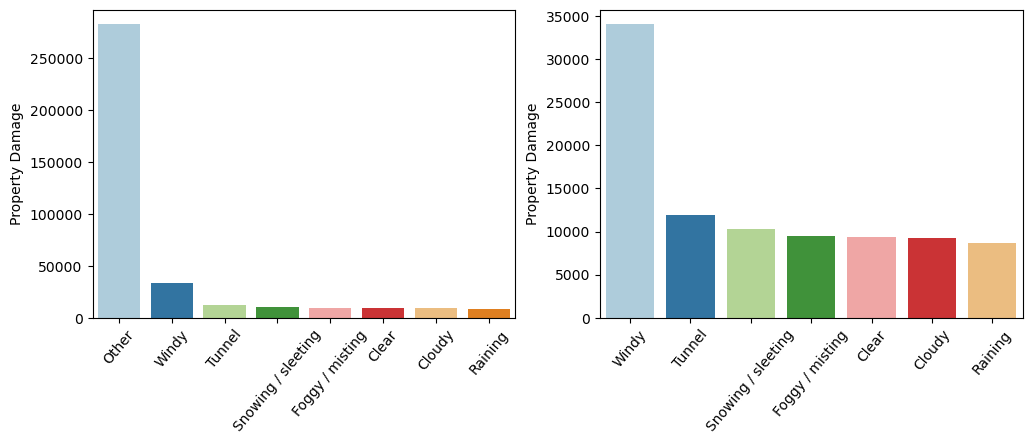

In [27]:
weather_df_filtered = weather_df[weather_df["Weather"] != "Other"]
fig, axes = plt.subplots(figsize=(12, 4), ncols=2)


sns.barplot(x='Weather', y="Property Damage", data=weather_df, width=0.8, palette="Paired", ax=axes[0] )
axes[0].tick_params(axis='x', labelrotation=50)
axes[0].set_xlabel('')

sns.barplot(x='Weather', y="Property Damage", data=weather_df_filtered, width=0.8, palette="Paired", ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=50)
axes[1].set_xlabel('')

plt.show()

In [28]:
windy_df =  transit_df.loc[ transit_df['Weather'] == 'Windy']


windy_df[['Event Description']].value_counts()

Event Description                                                                                                                                                                                                                                                                                                                                                                                                      
{Redacted} had difficulty while mooring the vessel at {Redacted} {Redacted} of the {Redacted} {Redacted} {Redacted} {Redacted} due to strong winds and opposing current and experienced a hard landing with the north side of {Redacted} {Redacted} {Redacted} damage included the port side, aft brow of the vessel and damage to the first piling on the north side. No injuries. Total damage estimated at $ 65,000.    1
{Redacted} was attempting to dock and struck a mooring post.                                                                                                                       

#### :מסקנה

יש קשר בין מזג האוויר למהירות במן האירוע, אך גודל הנזק לא קשור בהכרח למהירות בהקשר של מזג אויר. כנראה גודל הנזק מושפע מתנאים אחרים המייחדים את מזג האוויר

מתוך הנתונים, במזג אוויר ערפילי ומעונן, המהירות בזמן ההתנגשות הייתה גבוהה יחסית משאר מזגי האוויר (למעט מנהרה ואחר)
ניתן לשער שמזג אוויר ערפילי ומעונן עלול להשפיע על הראייה של הנהגים כך שלנהג כלי התחבורה יש קושי בזיהוי האוביקט שאיתו התנגש ולכן המהירות בזמן הפגיעה הייתה גבוהה יחסית.



<div style="color:white;display:fill;border-radius:100px;
            background-color:##F05454;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'> Observation 3.  </b> <b></b> 

# "מסקנה 3- "תקיפות 

.רצינו לבדוק את מקרי התקיפה בכלי הרכב לפי זמן, מקום ונפגעים

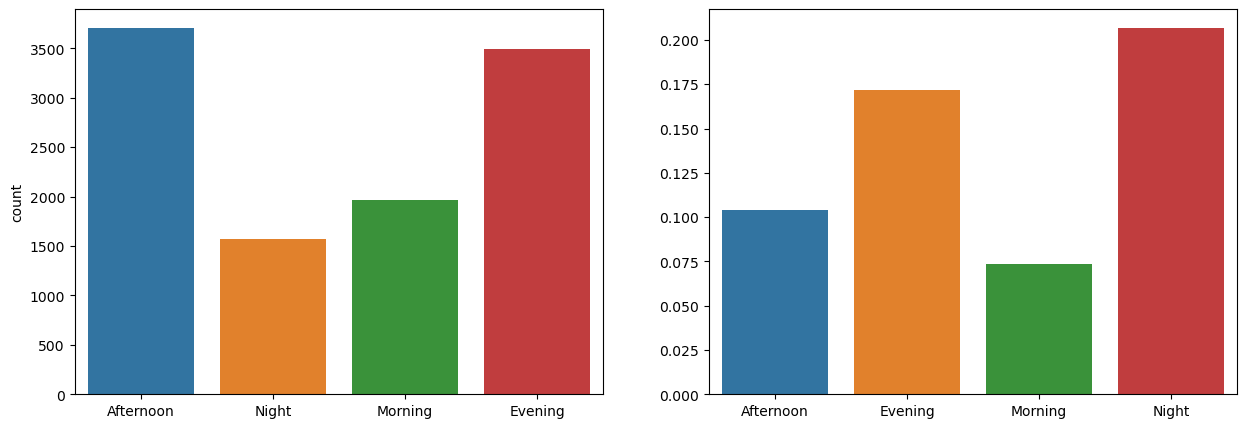

In [29]:
fig, axes = plt.subplots( figsize=(15, 5),ncols=2)

assault_df = transit_df[ transit_df['Event Type'] == 'Assault']
sns.countplot(assault_df, x='Time Period',ax=axes[0])
axes[0].set_xlabel('')


event_counts = assault_df.groupby('Time Period')['Event Type'].size()
total_events_count = transit_df.groupby('Time Period').size().values
relative_assault = event_counts/total_events_count

sns.barplot(x=event_counts.index, y=relative_assault.values,ax=axes[1])
axes[1].set_xlabel('')

plt.show()


<Axes: xlabel='Longitude', ylabel='Latitude'>

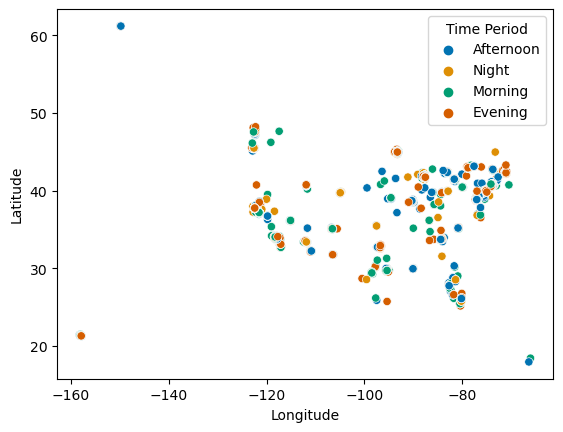

In [30]:
sns.scatterplot(data = assault_df, x = 'Longitude', y = 'Latitude', hue = "Time Period", palette = 'colorblind')

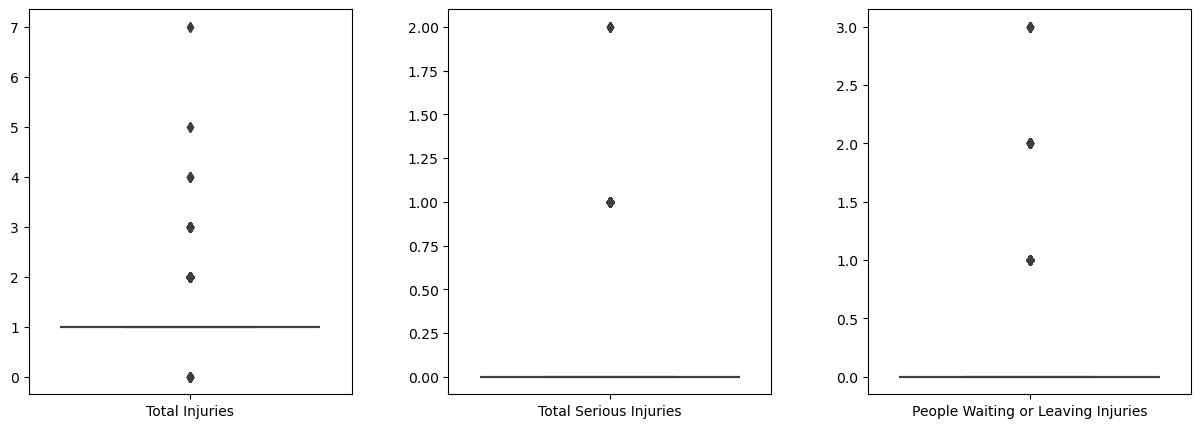

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.3)

sns.boxplot(data=assault_df[["Total Injuries"]], ax=axes[0])

sns.boxplot(data=assault_df[["Total Serious Injuries"]], ax=axes[1])

sns.boxplot(data=assault_df[["People Waiting or Leaving Injuries"]], ax=axes[2])

plt.show()


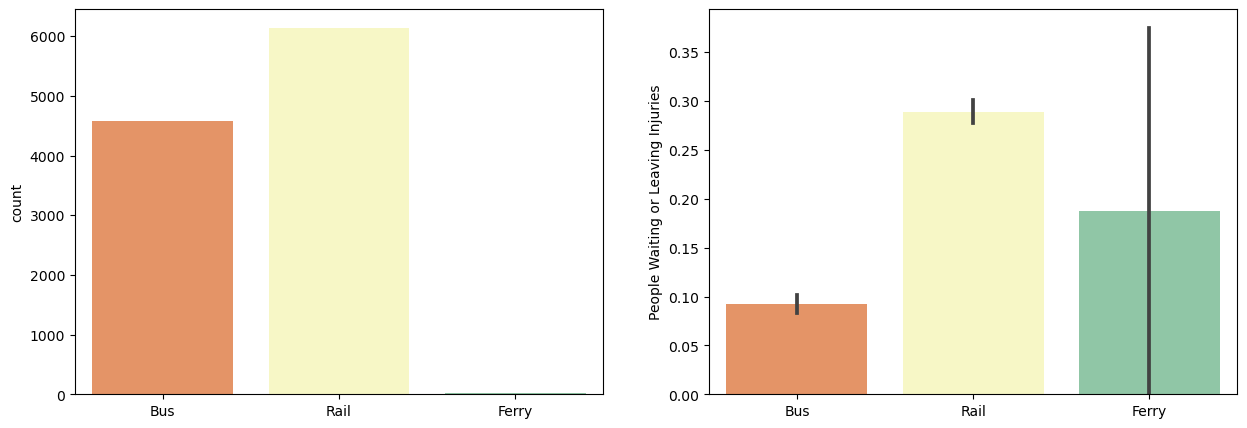

In [32]:
fig, axes = plt.subplots(figsize=(15, 5),ncols=2)
sns.countplot(assault_df  , x='Rail/Bus/Ferry',palette="Spectral",ax=axes[0])
axes[0].set_xlabel('')

sns.barplot(assault_df  , x='Rail/Bus/Ferry', y="People Waiting or Leaving Injuries", palette="Spectral",ax=axes[1])
axes[1].set_xlabel('')

plt.show()


#### :מסקנה

גילנו שרוב אירועי התקיפה התרחשו באופן יחסי בלילה ושאין קשר בין מיקום האירוע לזמן. 
ברוב מקרי התקיפה מספר הפצועים היה אחד ולרוב לא היה פצועים קשה או הרוגים. 
רוב מקרי התקפה התרחשו ברכבת וכן רוב בקרב הנפגעים שנפגעו  בהמתנה לכלי הרכב, מספר הנפגעים הרב ביותר באופן יחסי היו הממתינים מחוץ לרכבת.